## Utilisation d’un réseau de neurones

In [144]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from joblib import dump, load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

# ploting option
plt.rcParams['figure.figsize'] = [12.94, 8]
plt.rcParams['figure.dpi'] = 100 
#plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

SAVE_FIGS = True

In [145]:
dataset_wet = pd.read_csv('my_final_wet_data.csv')
dataset_wet.head()

,theta_sat,horizon,family,OM_content,pH,location,keyword,date,texture,particle_density,...,P2,P50,P100,P250,P500,P1000,P2000,rho,suction,theta
0,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.6,113.0,0.043
1,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.6,38.0,0.133
2,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.6,37.0,0.069
3,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.6,31.0,0.086
4,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.6,28.0,0.098


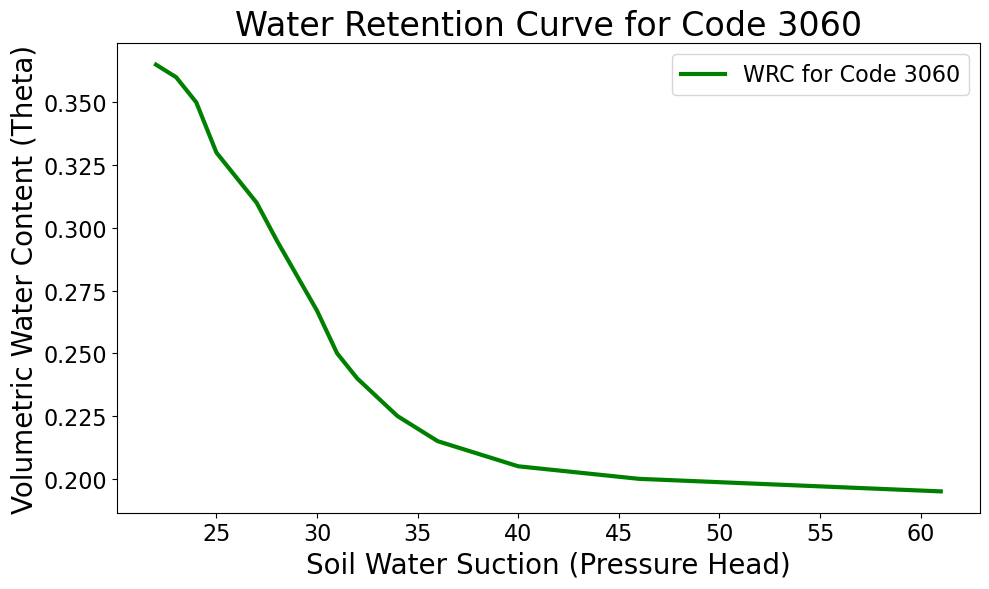

In [146]:
code_specific = 3060
filtered_data = dataset_wet[dataset_wet['code'] == code_specific]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['suction'], filtered_data['theta'], label='WRC for Code 3060', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 3060')
plt.legend()
plt.show()


In [147]:
dataset_wet.columns

Index(['theta_sat', 'horizon', 'family', 'OM_content', 'pH', 'location',
       'keyword', 'date', 'texture', 'particle_density', 'porosity', 'series',
       'k_sat', 'code', 'P2', 'P50', 'P100', 'P250', 'P500', 'P1000', 'P2000',
       'rho', 'suction', 'theta'],
      dtype='object')

In [148]:
dataset_wet.dropna(axis=0, inplace=True)
dataset_wet

,theta_sat,horizon,family,OM_content,pH,location,keyword,date,texture,particle_density,...,P2,P50,P100,P250,P500,P1000,P2000,rho,suction,theta
0,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.60,113.0,0.043
1,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.60,38.0,0.133
2,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.60,37.0,0.069
3,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.60,31.0,0.086
4,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.02,0.044,0.068513,0.142051,0.264615,0.509744,1.0,1.60,28.0,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.00,0.000,0.000000,0.348000,0.591000,0.907857,1.0,1.81,22.0,0.146
108,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.00,0.000,0.000000,0.348000,0.591000,0.907857,1.0,1.81,26.0,0.122
109,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.00,0.000,0.000000,0.348000,0.591000,0.907857,1.0,1.81,30.0,0.108
110,0.503,0.0,0.0,0.885,4.183,0.0,0.0,0.0,0.0,2.634,...,0.00,0.000,0.000000,0.348000,0.591000,0.907857,1.0,1.81,31.0,0.106


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

def model_theta_MLP(dataset_wet, hidden_layers=(10,), print_coefs=True, max_iter=1000000):
    X = dataset_wet[['P2', 'P50', 'P100', 'P250', 'P500', 'P1000', 'P2000', 'rho', 'suction', 'code']]
    Y = dataset_wet['theta']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # we take off code to avoid data leakage, another solution would be to use it as index like prof suggested
    X_train_no_code = X_train.drop(columns=['code'])
    X_test_no_code = X_test.drop(columns=['code'])
    
    model = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=max_iter, random_state=42)
    model.fit(X_train_no_code, Y_train)
    
    Yhat_train = model.predict(X_train_no_code)
    Yhat_test = model.predict(X_test_no_code)
    
    train_loss = mean_squared_error(Y_train, Yhat_train)
    test_loss = mean_squared_error(Y_test, Yhat_test)
    print(f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    return model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss


In [150]:
def graph_real_and_predicted(X_train, X_test, Y_train, Y_test, Yhat, Yhat_test, fname=None):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.plot(Y_train, Yhat,'r.')
    ax.plot(Y_train, Y_train,'k-')
    ax.set_xlabel('Training values')
    ax.set_ylabel('Predicted values')
    ax = fig.add_subplot(122)
    ax.plot(Y_test, Yhat_test,'b.')
    ax.plot(Y_test, Y_test,'k-')
    ax.set_xlabel('Testing values')
    ax.set_ylabel('Predicted values')
    if fname is not None:
        plt.savefig(fname + '.pdf')
        plt.show()
    plt.close()

In [151]:

model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss = model_theta_MLP(dataset_wet, [100])


Train Loss: 0.0088, Test Loss: 0.0227


In [152]:
print(f"Model R^2 Score on Test Set: {model.score(X_test.drop(['code'],axis=1), Y_test):.4f}")


Model R^2 Score on Test Set: -2.5856


In [153]:
##wrc curve

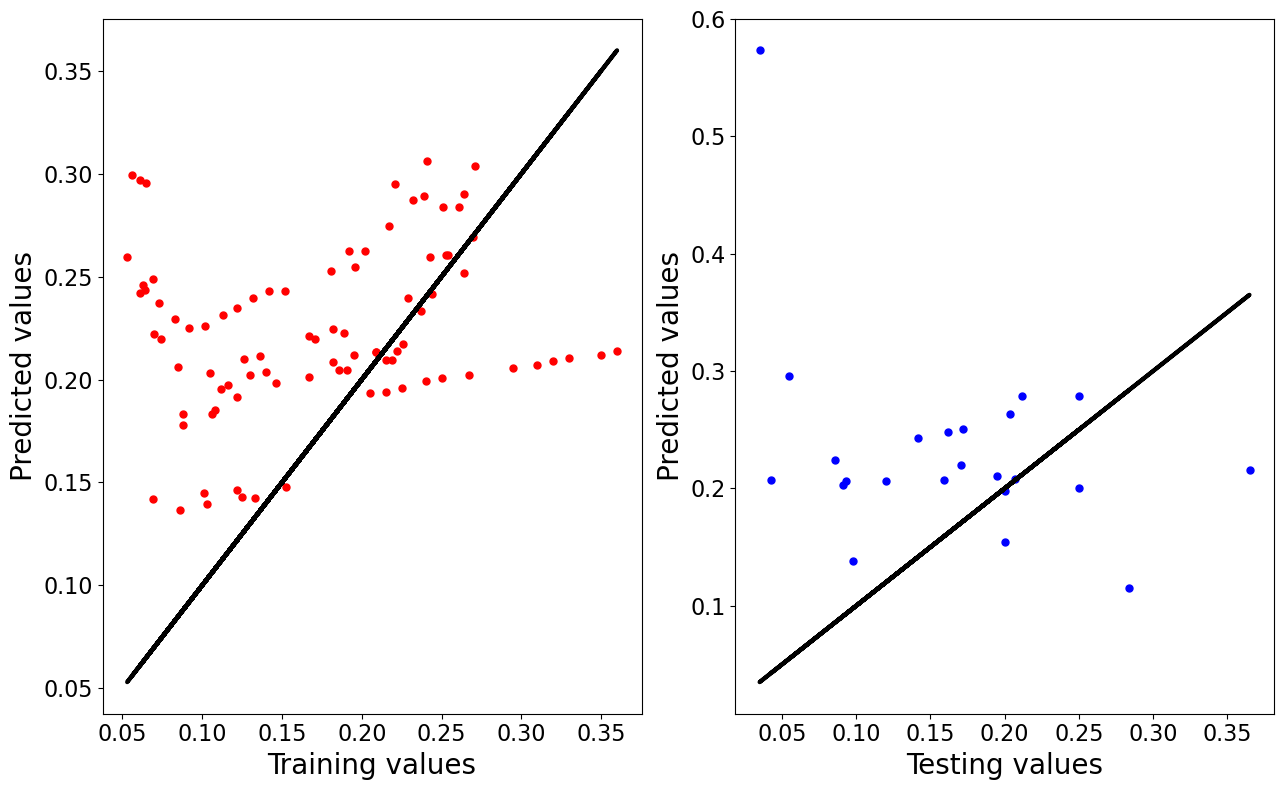

In [154]:
graph_real_and_predicted(X_train.drop(['code'],axis=1), X_test.drop(['code'],axis=1), Y_train, Y_test, Yhat_train, Yhat_test, fname='result_1')

In [155]:
print('Testing the model with a sample input:')
input_features = [0.1,0.2,0.3,0.5,0.6,1,1.7,0.1, 2.0] 
print(model.predict([input_features]))

Testing the model with a sample input:
[0.29042018]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [156]:
dump(model, 'model_2.joblib')

['model_2.joblib']

In [157]:
#test (reload model + prediction):
model = load('model_2.joblib') 
print('testing the model reloaded:')
print(model.predict([[0,0.1,0.2,0.3,0.5,0.6,1,1.7,100]]))

testing the model reloaded:
[0.21771013]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [158]:
import matplotlib.pyplot as plt

#inspired from teacher

def plot_predicted_vs_real(Y_test, Yhat_test):
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test, Yhat_test, alpha=0.5, label='Predicted vs Real')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal')
    plt.xlabel('Real Value')
    plt.ylabel('Predicted Value')
    plt.title('Predicted vs Real Values')
    plt.legend()
    plt.show()

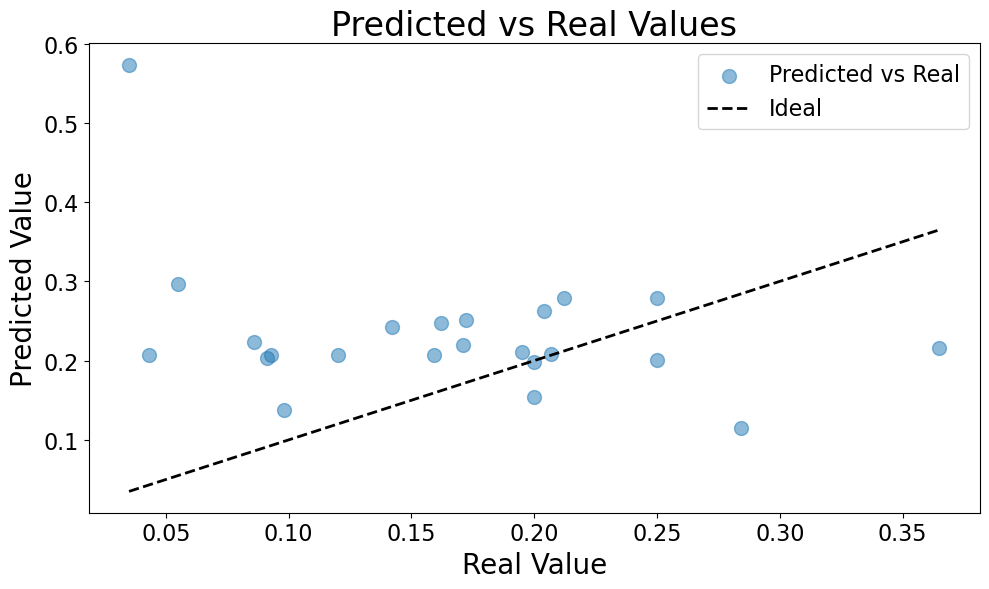

In [159]:
plot_predicted_vs_real(Y_test, Yhat_test)

In [160]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Y_test)
])

code_specific = 3060
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted = combined_data_filtered_sorted['theta']


In [161]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Yhat_test)
])

code_specific = 3060
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted_hat = combined_data_filtered_sorted['theta']

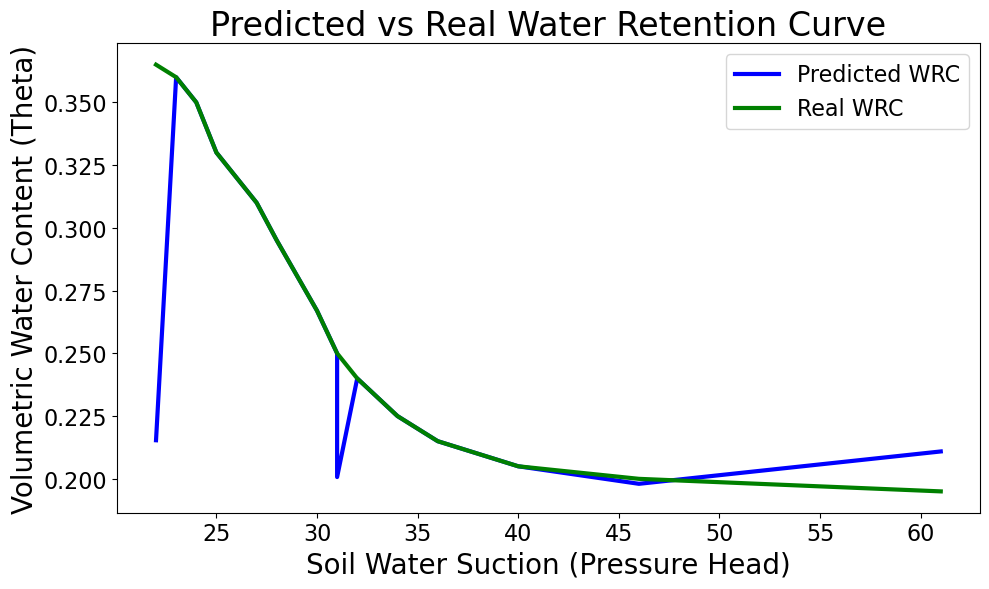

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='Predicted WRC', color='blue')
plt.plot(suction_sorted, theta_sorted, label='Real WRC', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Predicted vs Real Water Retention Curve')
plt.legend()
plt.show()

## Adding GridsearchCV

In [163]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

def model_theta_MLP_with_GridSearchCV(dataset_wet, print_coefs=True):
    X = dataset_wet[['P2', 'P50', 'P100', 'P250', 'P500', 'P1000', 'P2000', 'rho', 'suction', 'code']]
    Y = dataset_wet['theta']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    X_train_no_code = X_train.drop(columns=['code'])
    X_test_no_code = X_test.drop(columns=['code'])
    
    model = MLPRegressor(random_state=42)
    parameter_space = {
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'max_iter': [1000, 5000, 10000],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive'],
    }
    
    clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
    clf.fit(X_train_no_code, Y_train)
    
    best_model = clf.best_estimator_
    
    Yhat_train = best_model.predict(X_train_no_code)
    Yhat_test = best_model.predict(X_test_no_code)
    
    train_loss = mean_squared_error(Y_train, Yhat_train)
    test_loss = mean_squared_error(Y_test, Yhat_test)
    print(f"Best parameters found: {clf.best_params_}")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    return best_model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss


In [164]:

model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss = model_theta_MLP_with_GridSearchCV(dataset_wet)


Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Train Loss: 0.0043, Test Loss: 0.0046


In [165]:
print(f"Model R^2 Score on Test Set: {model.score(X_test.drop(['code'],axis=1), Y_test):.4f}")

Model R^2 Score on Test Set: 0.2686


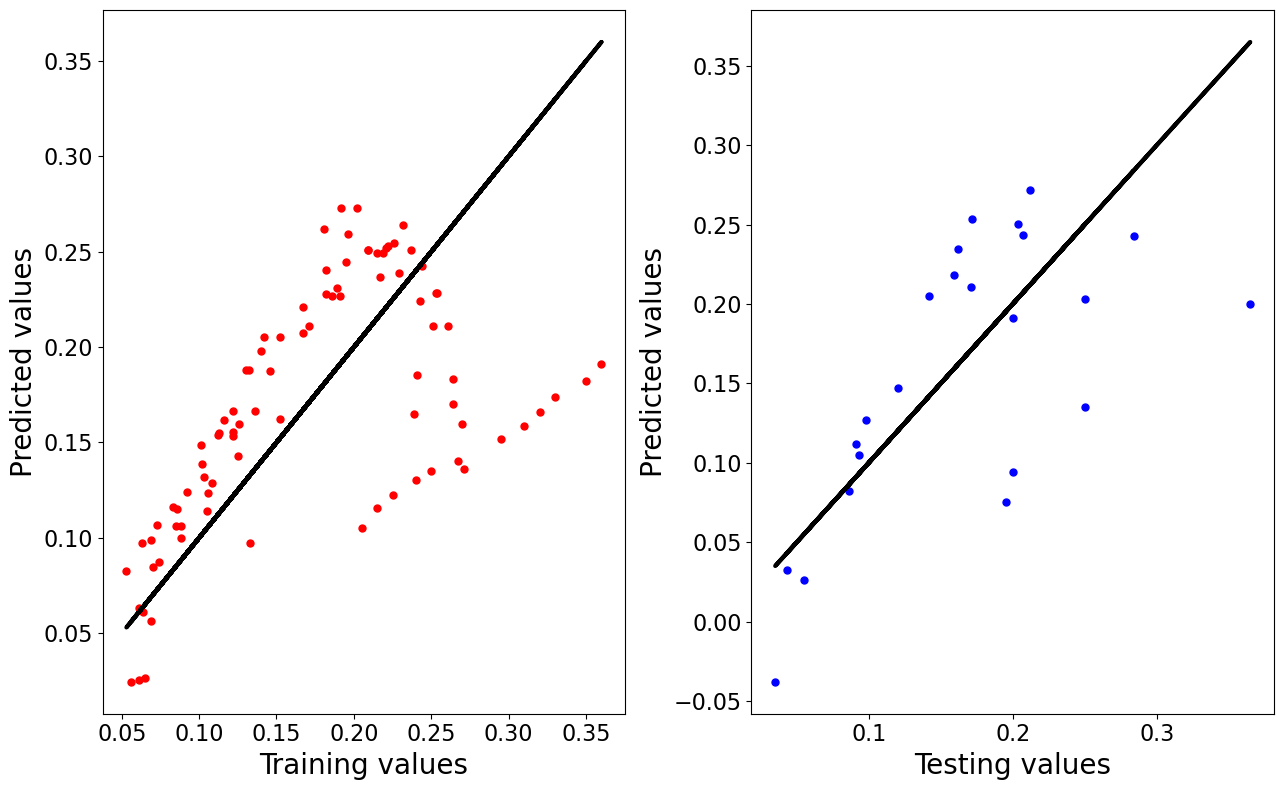

In [166]:
graph_real_and_predicted(X_train.drop(['code'],axis=1), X_test.drop(['code'],axis=1), Y_train, Y_test, Yhat_train, Yhat_test, fname='result_1')

In [167]:
print('Testing the model with a sample input:')
input_features = [0.1,0.2,0.3,0.5,0.6,1,1.7,0.1, 2.0] 
print(model.predict([input_features]))

Testing the model with a sample input:
[0.62680752]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [168]:
dump(model, 'model_2_wet.joblib')

['model_2_wet.joblib']

In [169]:
#test (reload model + prediction):
model = load('model_2_wet.joblib') 
print('testing the model reloaded:')
print(model.predict([[0,0.1,0.2,0.3,0.5,0.6,1,1.7,100]]))

testing the model reloaded:
[0.0508297]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


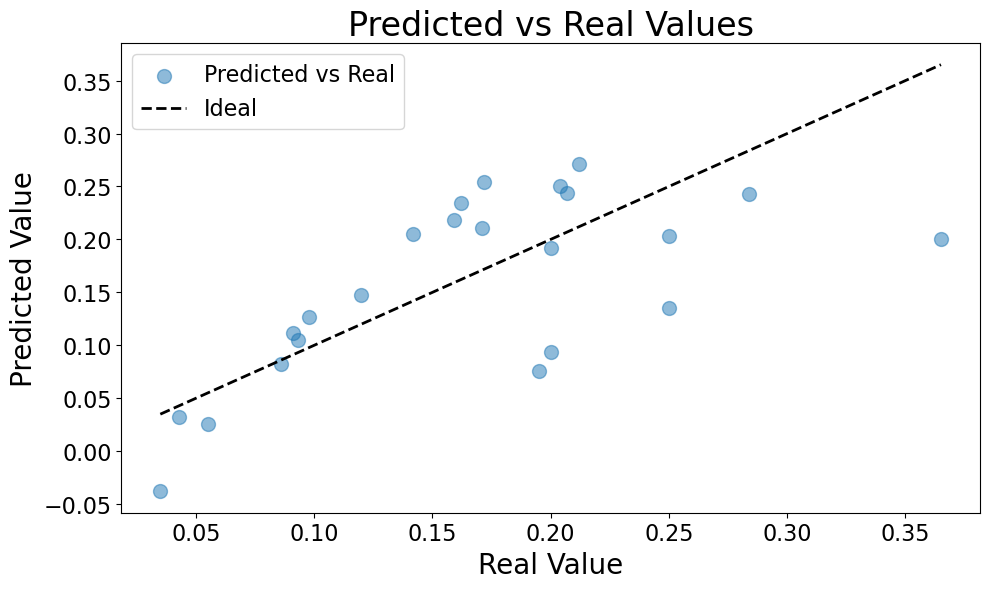

In [170]:
plot_predicted_vs_real(Y_test, Yhat_test)

In [171]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Y_test)
])

code_specific = 3060
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted = combined_data_filtered_sorted['theta']


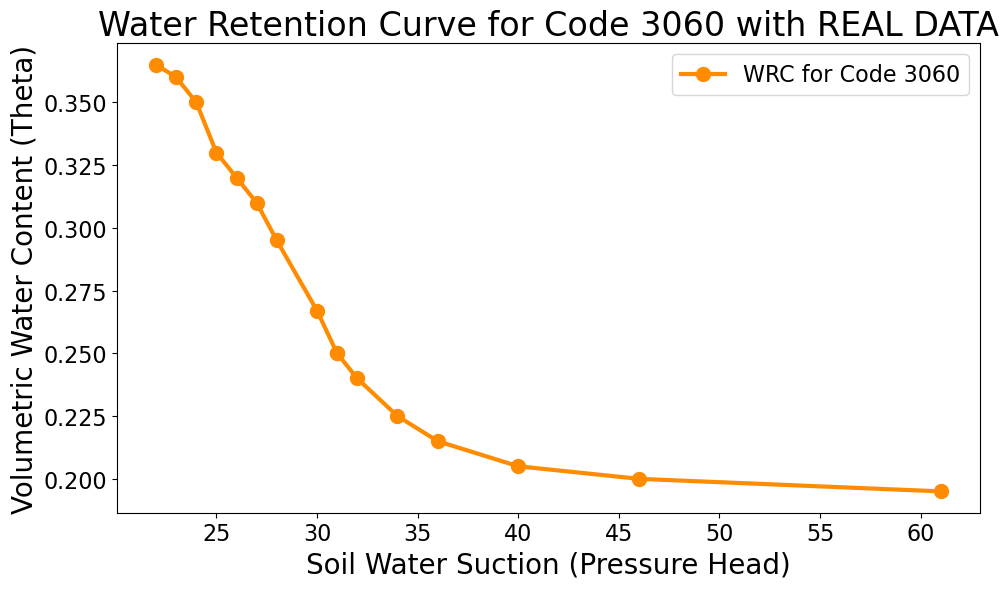

In [172]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted, label='WRC for Code 3060', marker='o', linestyle='-', color='darkorange')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 3060 with REAL DATA')
plt.legend()
plt.show()


In [173]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Yhat_test)
])

code_specific = 3060
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted_hat = combined_data_filtered_sorted['theta']

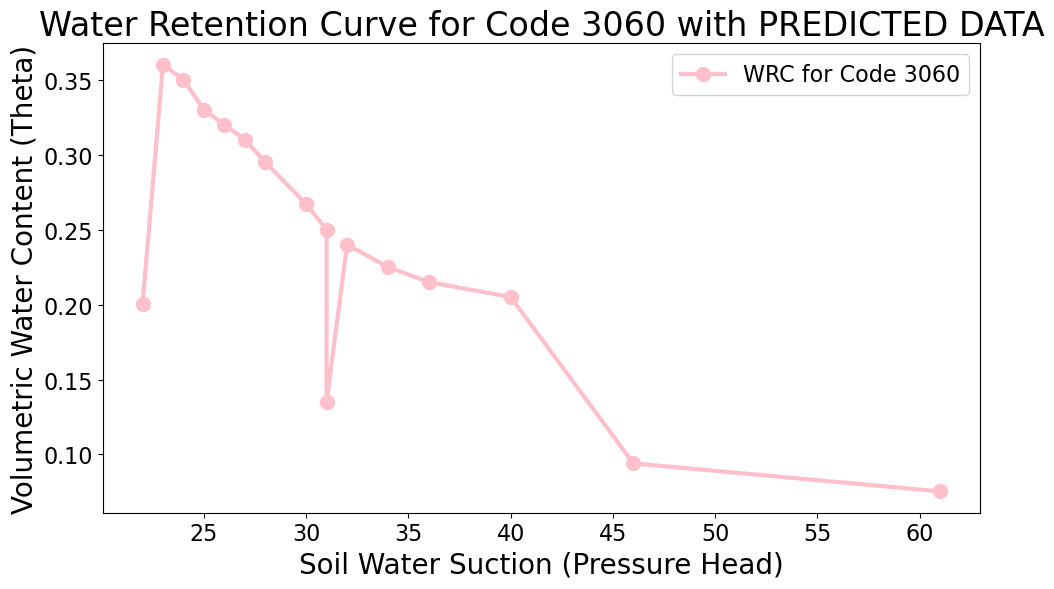

In [174]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='WRC for Code 3060', marker='o', linestyle='-', color='pink')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 3060 with PREDICTED DATA')
plt.legend()
plt.show()


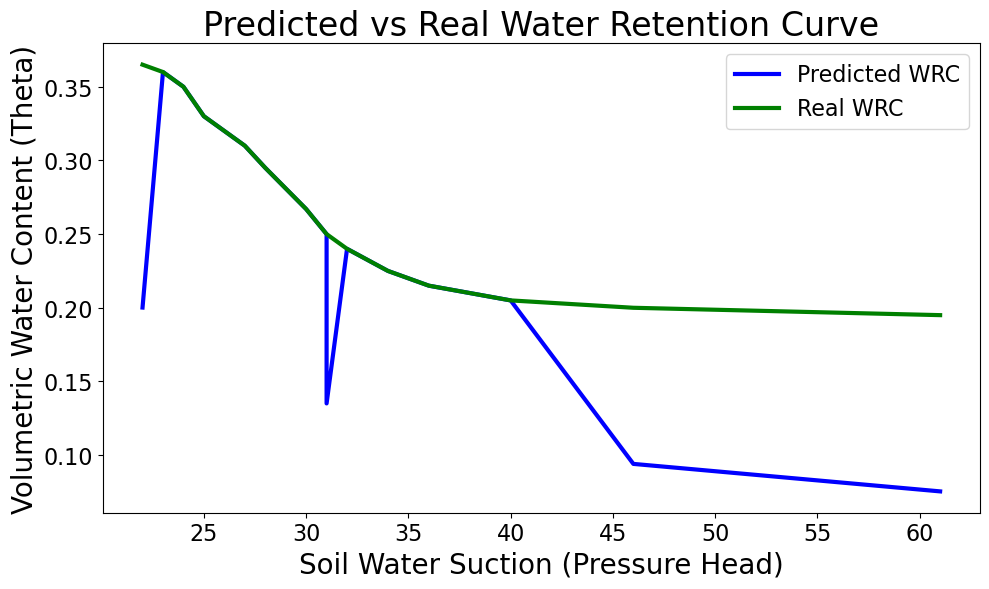

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='Predicted WRC', color='blue')
plt.plot(suction_sorted, theta_sorted, label='Real WRC', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Predicted vs Real Water Retention Curve')
plt.legend()
plt.show()

## Adding other features 

In [176]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

def model_theta_MLP_with_GridSearchCV(dataset_wet, print_coefs=True):
    X = dataset_wet.drop(['theta'], axis =1)
    Y = dataset_wet['theta']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    X_train_no_code = X_train.drop(columns=['code'])
    X_test_no_code = X_test.drop(columns=['code'])
    
    model = MLPRegressor(random_state=42)
    parameter_space = {
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'max_iter': [1000, 5000, 10000],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive'],
    }
    
    clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
    clf.fit(X_train_no_code, Y_train)
    
    best_model = clf.best_estimator_
    
    Yhat_train = best_model.predict(X_train_no_code)
    Yhat_test = best_model.predict(X_test_no_code)
    
    train_loss = mean_squared_error(Y_train, Yhat_train)
    test_loss = mean_squared_error(Y_test, Yhat_test)
    print(f"Best parameters found: {clf.best_params_}")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    return best_model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss


In [177]:

model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss = model_theta_MLP_with_GridSearchCV(dataset_wet)


Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
Train Loss: 0.0022, Test Loss: 0.0079


In [178]:
print(f"Model R^2 Score on Test Set: {model.score(X_test.drop(['code'],axis=1), Y_test):.4f}")

Model R^2 Score on Test Set: -0.2459


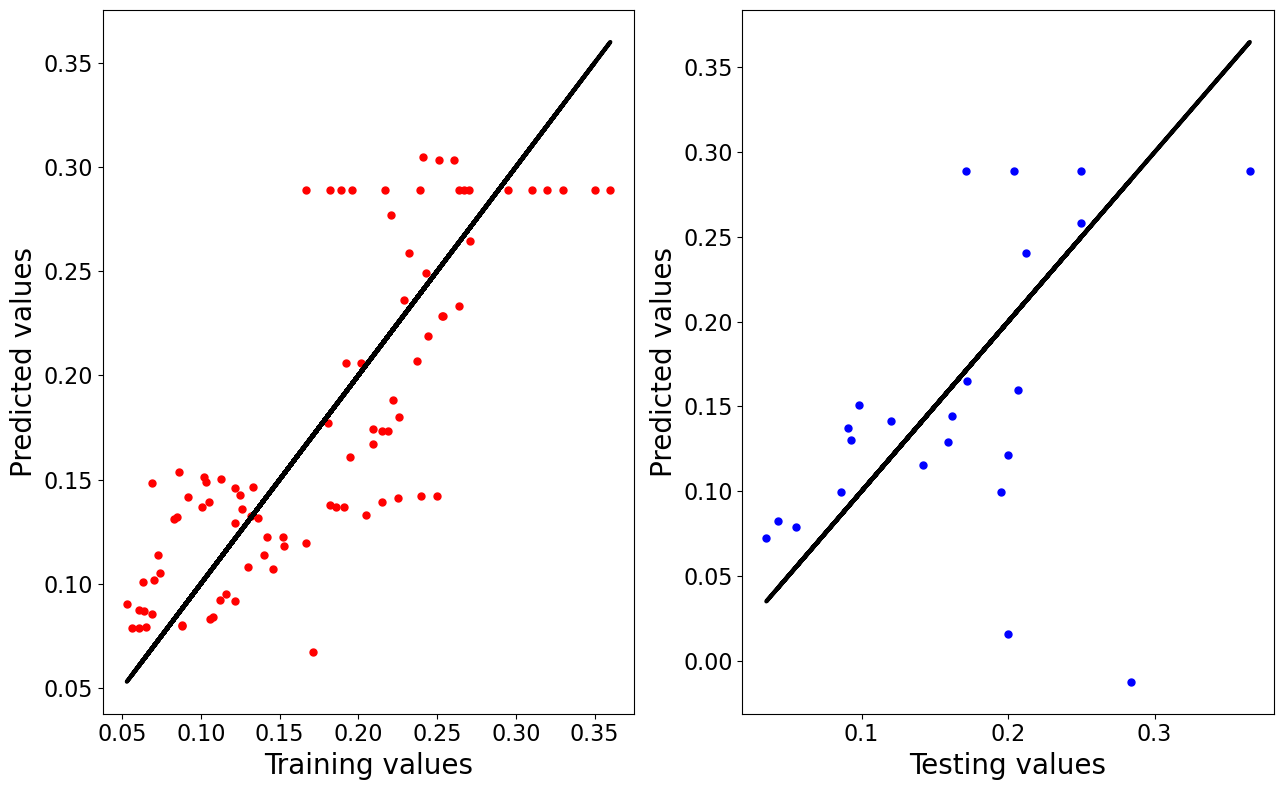

In [179]:
graph_real_and_predicted(X_train.drop(['code'],axis=1), X_test.drop(['code'],axis=1), Y_train, Y_test, Yhat_train, Yhat_test, fname='result_1')

In [180]:
dump(model, 'model_2_wet_full.joblib')

['model_2_wet_full.joblib']

In [181]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Y_test)
])

code_specific = 3060
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted = combined_data_filtered_sorted['theta']


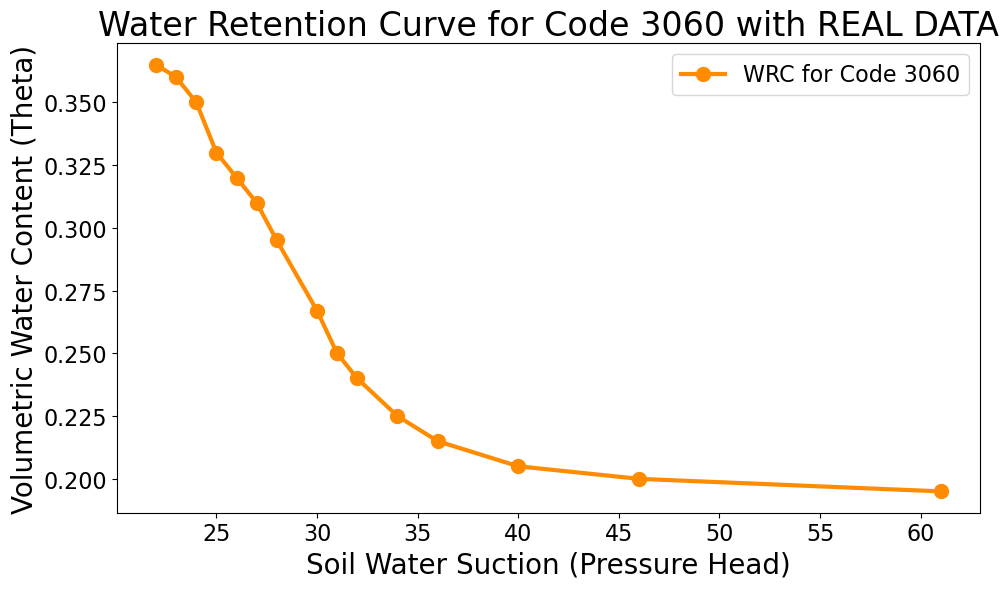

In [182]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted, label='WRC for Code 3060', marker='o', linestyle='-', color='darkorange')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 3060 with REAL DATA')
plt.legend()
plt.show()


In [183]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Yhat_test)
])

code_specific = 3060
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted_hat = combined_data_filtered_sorted['theta']

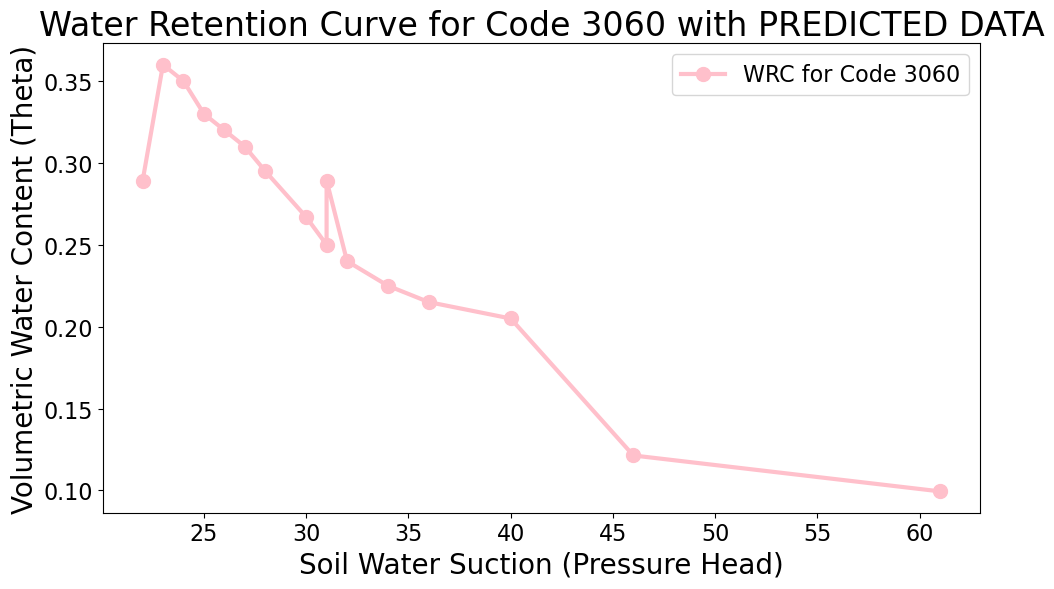

In [184]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='WRC for Code 3060', marker='o', linestyle='-', color='pink')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 3060 with PREDICTED DATA')
plt.legend()
plt.show()


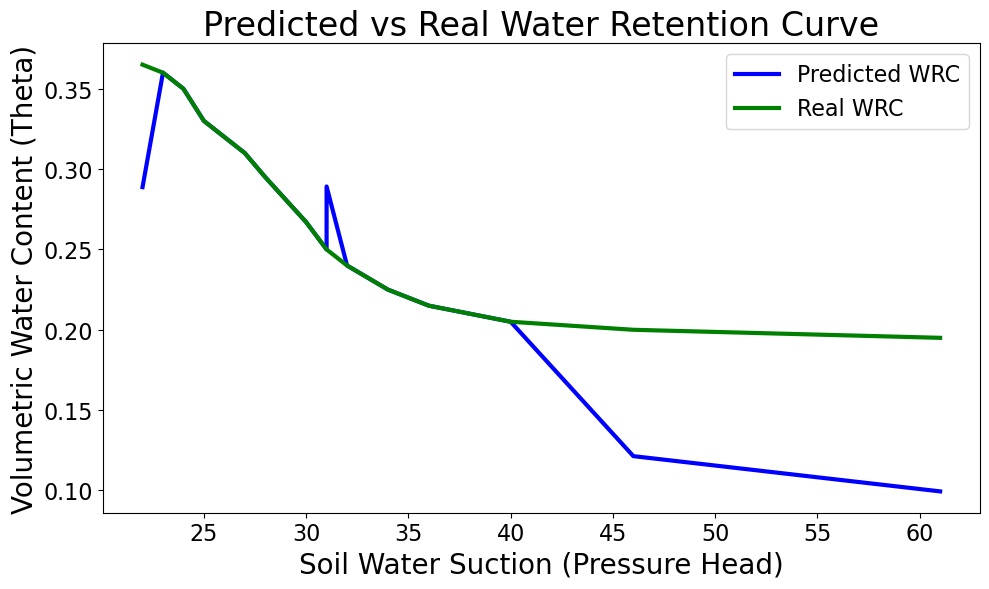

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='Predicted WRC', color='blue')
plt.plot(suction_sorted, theta_sorted, label='Real WRC', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Predicted vs Real Water Retention Curve')
plt.legend()
plt.show()